- root 는 학습/테스트 데이터가 저장되는 경로입니다.

- train 은 학습용 또는 테스트용 데이터셋 여부를 지정합니다.

- download=True 는 root 에 데이터가 없는 경우 인터넷에서 다운로드합니다.

- transform 과 target_transform 은 특징(feature)과 정답(label) 변형(transform)을 지정합니다.

In [1]:
# Fashin-MNIST dataset from TorchVision

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



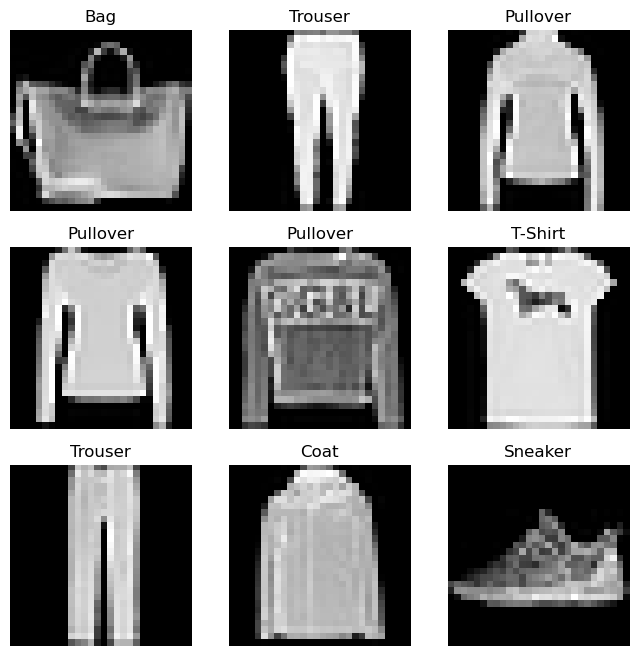

In [2]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

사용자 정의 Dataset Class는 반드시 3개의 함수를 구현해야 함.

\__init__, \__len__, \__getitem__

In [3]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

\__init__ : Dataset 객체가 생성될때 한 번만 실행
- 이미지와 주석 파일이 포함된 디렉토리와 두가지 변형을 초기화

\__len__ : 데이터셋의 샘플 개수를 반환

\__getitem__ : 주어진 인덱스에 해당하는 샘플을 데이터셋에 불러오고 반환
- 인덱스를 기반으로 디스크에서 위치를 식별
- **read_image**를 사용하여 이미지를 텐서로 변환
- **self.img_labels**의 csv데이터로부터 해당하는 **label**을 가져옴
- 변형 함수를 호출한 뒤 텐서 이미지와 라벨을 dict형으로 반환

In [4]:
# DataLoader

from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

minibatch, 매 epoch마다 데이터를 다시 섞어서 overfitting을 막고 multiprocessing을 사용하여 데이터 검색 속도를 높임

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


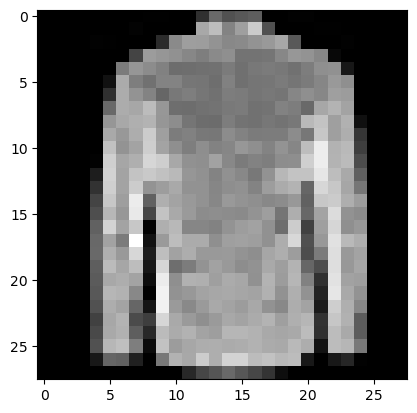

Label: 6


In [7]:
# iterate
# train_features와 train_labels의 묶음(batch)를 반환
# shuffle=True이므로 모든 batch를 순환한 뒤 데이터가 섞임

train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")